In [49]:
import plot_wrm
import matplotlib.pyplot as plt
import numpy as np

In [59]:
# Creating an object for the peat material [based on freezeup.xml]
alpha_peat = 0.0005
n_peat = 1.39
wres_peat = 0.05
smoothing_interval_peat = 0.05
peat_VGc = plot_wrm.VanGenuchten(alpha=alpha_peat,n=n_peat,sr=wres_peat,smoothing_interval_sat=smoothing_interval_peat)

In [60]:
# Creating an object for the mineral material [based on freezeup.xml]
alpha_mineral = 2e-5
n_mineral = 1.58
wres_mineral = 0.2
smoothing_interval_mineral = 0.05
mineral_VGc = plot_wrm.VanGenuchten(alpha=alpha_mineral,n=n_mineral,sr=wres_mineral,smoothing_interval_sat=smoothing_interval_mineral)

In [61]:
mineral_VGc.short_label()

'VG: a=2.00e-05 [1/Pa], n=1.6, sr=0.2'

<AxesSubplot:xlabel='saturation [-]', ylabel='capillary pressure [Pa]'>

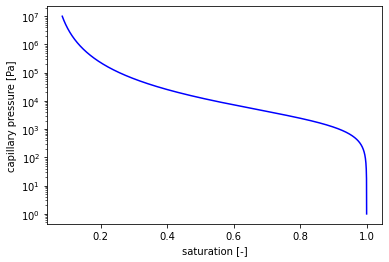

In [71]:
fig,ax1 = plt.subplots(1,1,squeeze=True)
plot_wrm.plot(peat_VGc,ax=ax1)
#plot_wrm.plot(mineral_VGc,ax=ax1)

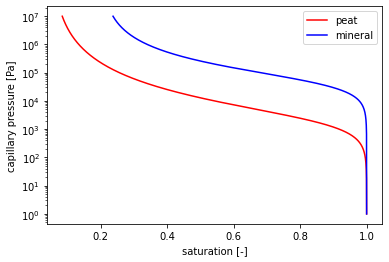

In [68]:
# Plotting based on my requirement:
# Following the same code from plot_wrm

pc = np.linspace(0,7,1000)
pc = 10**pc

fig,ax = plt.subplots(1,1,squeeze=True)

s_peat = np.array([peat_VGc.saturation(apc) for apc in pc])
s_mineral = np.array([mineral_VGc.saturation(apc) for apc in pc])

# Calculating pc in meters
pc_m = pc / 1000 / 9.81


ax.semilogy(s_peat, pc, color='r', label='peat')
ax.semilogy(s_mineral, pc, color='b', label='mineral')
plt.xlabel("saturation [-]")
plt.ylabel("capillary pressure [Pa]")
plt.legend()

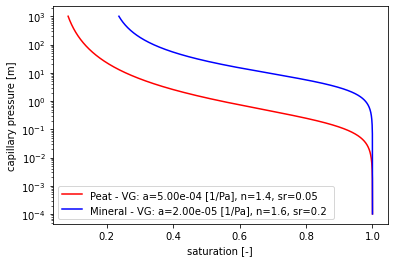

In [74]:
# Plotting based on my requirement:
# Following the same code from plot_wrm

pc = np.linspace(0,7,1000)
pc = 10**pc

fig,ax = plt.subplots(1,1,squeeze=True)

s_peat = np.array([peat_VGc.saturation(apc) for apc in pc])
s_mineral = np.array([mineral_VGc.saturation(apc) for apc in pc])

# Calculating pc in meters
pc_m = pc / 1000 / 9.81


ax.semilogy(s_peat, pc_m, color='r', label=f'Peat - {peat_VGc.short_label()} ')
ax.semilogy(s_mineral, pc_m, color='b', label=f'Mineral - {mineral_VGc.short_label()} ')
plt.xlabel("saturation [-]")
plt.ylabel("capillary pressure [m]")
plt.legend()

Comments:
- Peat loses water easily since the value of alpha is higher
- The residual saturation of peat is lower and hence has a greater range for saturation.

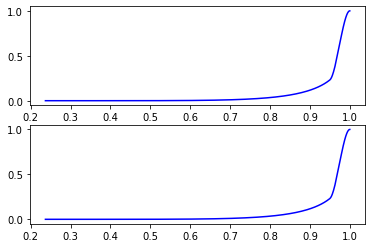

In [41]:
fig,(ax1,ax2) = plt.subplots(2,1,squeeze=True)
plot_wrm.plot_kr(peat_VGc,ax=ax1)
plot_wrm.plot_kr(mineral_VGc,ax=ax2)

Comments:
- Improve the plotting style! - Add both labels in one figure, Increase the size of the figure
- Add the kr variable also towards the right of the figure